In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [22]:
df = pd.read_csv('Microsoft_Stock.csv')

In [24]:
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [23]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [26]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


In [27]:
# Set the frequency of the dataframe to daily
df = df.asfreq('D')

In [28]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322.0
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476.0
2015-04-03 16:00:00,NaN,NaN,NaN,NaN,NaN
2015-04-04 16:00:00,NaN,NaN,NaN,NaN,NaN
2015-04-05 16:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-03-27 16:00:00,NaN,NaN,NaN,NaN,NaN
2021-03-28 16:00:00,NaN,NaN,NaN,NaN,NaN
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455.0


In [29]:
# Handle missing values in the Close column
df['Close'] = df['Close'].interpolate()


In [31]:
# Time Series Decomposition
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

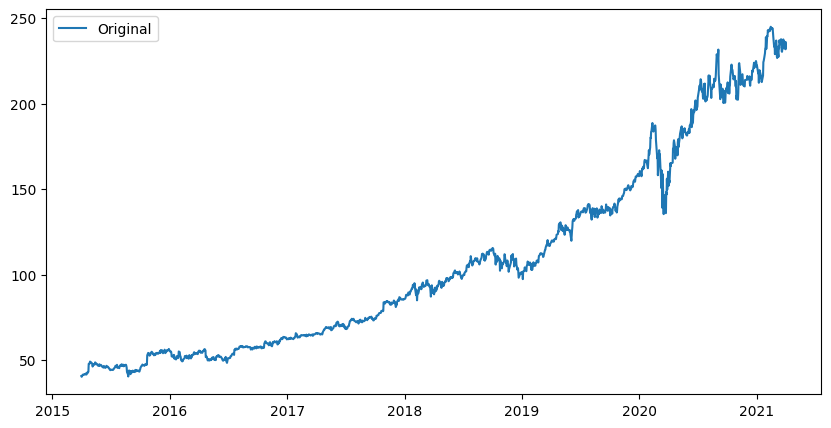

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Original')
plt.legend(loc='best')

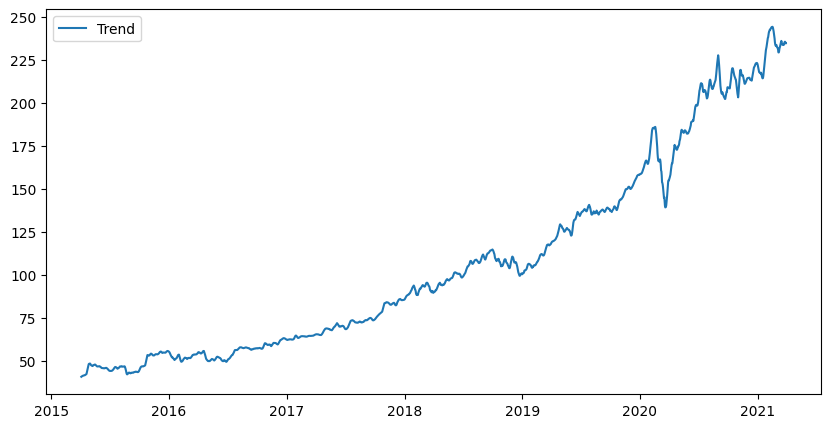

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(trend, label='Trend')
plt.legend(loc='best')

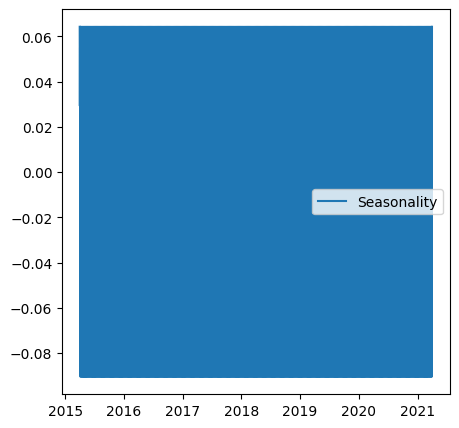

In [38]:
plt.figure(figsize=(5, 5))
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

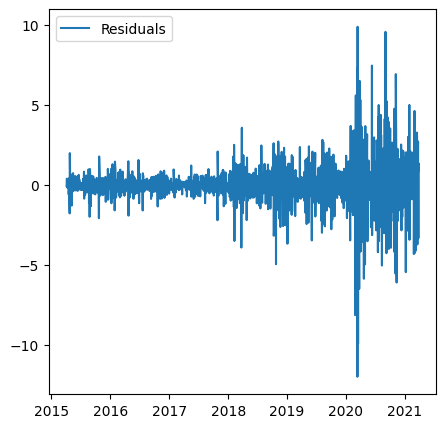

In [39]:
plt.figure(figsize=(5, 5))
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

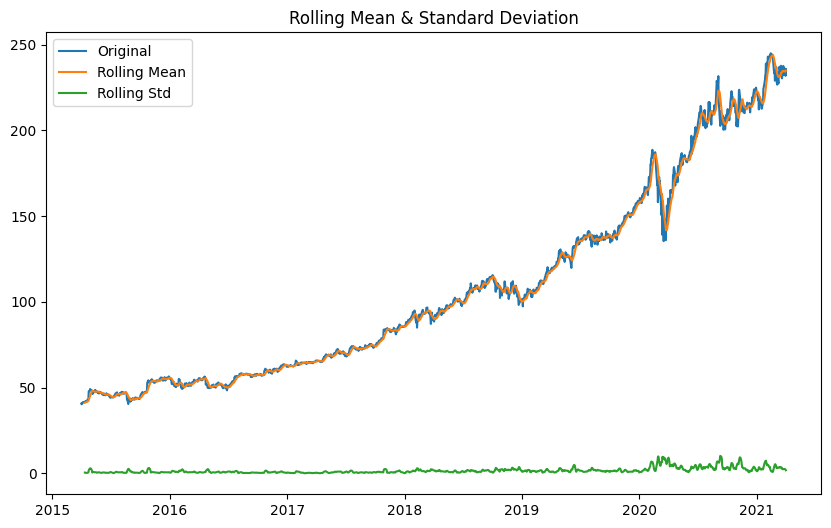

In [40]:
# Rolling Statistics
rolling_mean = df['Close'].rolling(window=12).mean()
rolling_std = df['Close'].rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


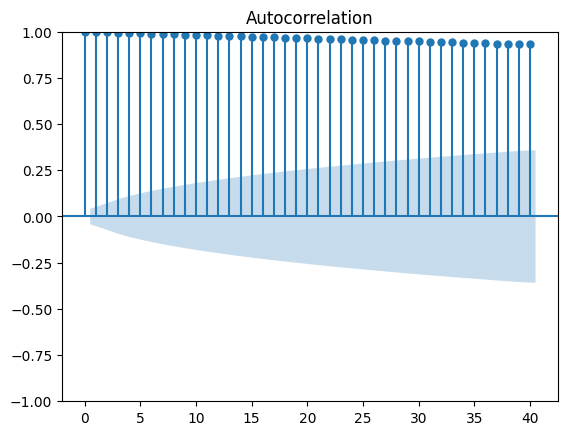

In [43]:
sm.graphics.tsa.plot_acf(df['Close'], lags=40)
plt.show()

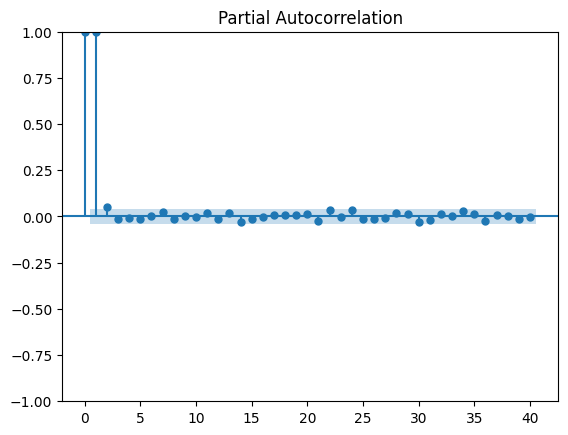

In [44]:
sm.graphics.tsa.plot_pacf(df['Close'], lags=40)
plt.show()

In [48]:
# Augmented Dickey-Fuller test
adf_test = adfuller(df['Close'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
for key, value in adf_test[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.372522750353179
p-value: 0.9969856712717549
Critical Values:
   1%, -3.4333684674663467
Critical Values:
   5%, -2.8628734534635902
Critical Values:
   10%, -2.5674798640234444


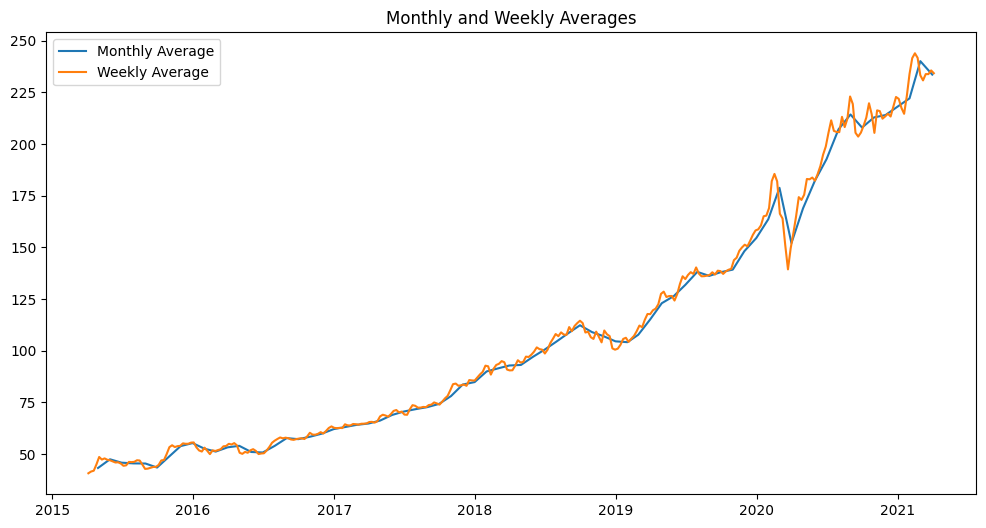

In [46]:
# Seasonality Analysis
monthly_avg = df['Close'].resample('M').mean()
weekly_avg = df['Close'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg, label='Monthly Average')
plt.plot(weekly_avg, label='Weekly Average')
plt.legend(loc='best')
plt.title('Monthly and Weekly Averages')
plt.show()